<a href="https://www.kaggle.com/code/ayushs9020/re-creating-protein-neural-nets-from-scratch?scriptVersionId=135975793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Protein Neural Network

$Protein$ $Neural$ $Network$ is a type of `deep learning neural network` that is used to `predict` the `properties of proteins`. They are `trained` on a `large dataset` of `protein sequences`/`structures`. The network learns to `identify patterns` in the data that are associated with `particular properties`. $Protein$ $Neural$ $Networks$ have been shown to be `very effective` at `predicting protein properties`. In many cases, they `outperform traditional` methods that rely on `hand-crafted features`

<img src = "https://scontent.fjai2-1.fna.fbcdn.net/v/t1.6435-9/37298434_654990401529724_543197132539035648_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=730e14&_nc_ohc=7hJcasqo1PkAX8fs55i&_nc_ht=scontent.fjai2-1.fna&oh=00_AfBLiYMGoJgSMX0w-kd690Y2GvRX4ga07ER2OXTSeH7o5w&oe=64CE544A" width = 400>


# 1 | Basic Terminologies 💻

* $Structure$ $of$ $a$ $Protein$
* $Gene$ $Ontology$ $(GO)$
* $Principal$ $Component$ $Analaysis$
* $Transformers$

## 1.1 | Structure of a Protein

So what is a actually a **Protein...?**

First of all lets understand the structure of an **Atom**

<img src = "https://www.sciencefacts.net/wp-content/uploads/2020/11/Parts-of-an-Atom-Diagram.jpg"  width = 300>

There is a really good image I found of the `structure of atom`. Though there are many debates on the structure like this, but this `model is accepted universaly at this moment`.

In the centre we have the `Neucleus`. The `Neucleus` is made up of $2$ more structures named as `Neutron` and `Proton`. A `Proton` is `positively charged element` and a `Neutron` is a `neutral charged element`. A `Electron`, `negatively charged element`, `orbits` this `Neucleus` at some `distance apart`.

The `more we increase the number` of `Electrons` and `Protons`. The `bigger the atoms becomes`.

There are `different shells` where the `Electrons reside`. The `more closer the shell` is, the `less Electrons` it contrains. There are mainly $4$ shells. 

|||
|---|---
|$K$|$2$
|$L$|$8$
|$M$|$18$
|$N$|$32$

Once an atom `fills its outer most shell` with `Electrons`. It becomes `stable atom` and try to `refuse any donation` or `recieve of extra atom`.

<img src = "https://cdn1.byjus.com/wp-content/uploads/2022/01/word-image128.png" width = 400>

`Different atoms combine` to `share Electrons` and become `stable Molecules` 

<img src = "https://www.astrochem.org/sci_img/Amino_Acid_Structure.jpg" width = 300>

A `Amino Acid` is made up of mainly $4$ different atoms
`[H , C , O , N]`. 

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/L-amino_acid_structure.svg/1200px-L-amino_acid_structure.svg.png" alt = "Bro use Light Theme" width = 300 >

We also have a free `Electron Pair` of `Carbon` in this molecule, we call this as a `Side Chain` which can be of different types. Basically this `Side Chain` provide the flexibility to make `different types` of `Amino Acids`. This flexibilty allows for $20$ `different` `Amino Acids` 

When we join `Amino Acids` with `peptide bonds`, we get `Proteins`. Conncecting different types of `Amino Acids` ends up in different types of `Proteins`.

## 1.2 | Gene Ontology (GO)

$Gene$ $Ontology$ $(GO)$ is a `controlled vocabulary` that `describes the functions of genes` and gene products. It is constantly being updated as new information becomes available.

There are mainly $3$ `Ontologies`

||||
|---|---|---
|$Biological$ $Process$|Describes the `biological processes`|A gene product might be involved in the process of `cell cycle`/`signal transduction.`
|$Cellular$ $Component$|Describes the `cellular components`|A gene product might be located in the `nucleus`/`cytoplasm`.
|$Molecular$ $Function$|Describes the `molecular functions`|A gene product might be involved in the `catalysis of a reaction`/`binding of a molecule`.

**[Gene Ontology Documentation](http://geneontology.org/docs/ontology-documentation/)**

## 1.3 | Principal Component Analysis

<img src = "https://media.makeameme.org/created/pca-the-cause.jpg" width = 400>

$Principal$ $Component$ $Analysis$ $PCA$ is a `statistical procedure` that uses an `orthogonal transformation` to convert a set of `correlated variables` into a set of `uncorrelated variables` called principal components.

First we compute the Covariance Matrix with the formula 

$$Cov_{x , y} = \frac{\sum(x_i - x_{mean})(y_i - y_{mean})}{N-1}$$

Then we find the Eign Values and Eign Vectors 

## 1.4 | Transformers 

A $Transformer$ is a `deep learning architecture` that relies on the `attention mechanism`. It is notable for requiring `less training time`. The model takes in `tokenized` `byte pair encoding` `input` tokens, and at each layer, `contextualizes each token` with other (unmasked) input tokens in `parallel` via attention mechanism.

* $Attention$ $Mechanism$- The attention mechanism allows the transformer to `learn long-range dependencies` between `tokens` in a sequence. 
* $Self-Attention$ - Self-attention is a special type of attention that allows the transformer to `attend to itself`. This means that the transformer can learn relationships between different parts of the same sequence.
* $Encoder-Decoder$ $Architecture$ - The transformer is an `Encoder-Decoder` architecture. This means that the transformer has two parts
* * Encoder - takes the input sequence and produces a sequence of hidden states
* * Decoder - takes these hidden states and produces the output sequence.

$$a = Softmax(\frac{KQ^T}{\sqrt{d_k}})$$

<img src = "https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1.png" width = 400>

# 2 | Data 📊

The `goal` of this competition is to `predict the function of a set of proteins`. We will `develop a model trained` on the `amino-acid sequences` of the `proteins and on other data`. Our work `will help researchers` better `understand the function of proteins`, which is `important for discovering` `how cells, tissues, and organs work`.


In [1]:
import pandas as pd 
import re
from Bio import SeqIO

The $Training$ $Set$ contains all `proteins with annotated terms` that have been validated by 
* $Experimental$
* $High-Throughput$ $Evidence$
* [$Traceable$ $Author$ $Statement$](https://wiki.geneontology.org/index.php/Traceable_Author_Statement_(TAS)#:~:text=The%20TAS%20evidence%20code%20covers,annotations%20come%20from%20review%20articles.)
* [$Inferred$ $by$ $Curator$ $(IC)$](https://wiki.geneontology.org/Inferred_by_Curator_(IC)) 

**Any other sources of Data are allowed**

### 2.1.1.1 | Go-Basic.obo

The $Ontology$ data is in the `file go-basic.obo`. This file is in $OBO$ `Biology-Oriented Language`. The nodes in `the graph are indexed` by the `term name`
```
subontology_roots = {'BPO':'GO:0008150',
                     'CCO':'GO:0005575',
                     'MFO':'GO:0003674'}
```

In [2]:
with open('/kaggle/input/cafa-5-protein-function-prediction/Train/go-basic.obo') as file :
    
    content = file.read()
    stanzas =  re.findall(r'\[Term\][\s\S]*?(?=\n\[|$)' , content)
    
print(stanzas[0])

[Term]
id: GO:0000001
name: mitochondrion inheritance
namespace: biological_process
def: "The distribution of mitochondria, including the mitochondrial genome, into daughter cells after mitosis or meiosis, mediated by interactions between mitochondria and the cytoskeleton." [GOC:mcc, PMID:10873824, PMID:11389764]
synonym: "mitochondrial inheritance" EXACT []
is_a: GO:0048308 ! organelle inheritance
is_a: GO:0048311 ! mitochondrion distribution



### 2.1.1.2 | Training Sequences.fasta

This file contains only `sequences` for `proteins` with `annotations` in the dataset `labeled proteins`.

This files are in `FASTA` format. 

This file contains . To obtain the full set of protein sequences for unlabeled proteins, the Swiss-Prot and TrEMBL databases can be found here.

In [3]:
fasta_seq = SeqIO.parse(open("/kaggle/input/cafa-5-protein-function-prediction/Train/train_sequences.fasta") ,'fasta')

fasta_seq

### 2.1.1.3 | Train Terms.tsv

This file contains the list of annotated terms `ground truth` for the proteins in `train_sequences.fasta`. 

In [4]:
pd.read_csv("/kaggle/input/cafa-5-protein-function-prediction/Train/train_terms.tsv" , sep = "\t")

,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
2,A0A009IHW8,GO:0072523,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO
...,...,...,...
5363858,X5L565,GO:0050649,MFO
5363859,X5L565,GO:0016491,MFO
5363860,X5M5N0,GO:0005515,MFO
5363861,X5M5N0,GO:0005488,MFO


The first column indicates the `protein's UniProt accession ID`, the second is the `GO term ID`, and the third indicates in which `ontology the term appears`.

### 2.1.1.4 | Train Taxonomy.tsv

This file contains the list of `proteins and the species to which they belong`, represented by a `taxonomic identifier` `taxon ID` number.

In [5]:
pd.read_csv("/kaggle/input/cafa-5-protein-function-prediction/Train/train_taxonomy.tsv" , sep = "\t")

,EntryID,taxonomyID
0,Q8IXT2,9606
1,Q04418,559292
2,A8DYA3,7227
3,Q9UUI3,284812
4,Q57ZS4,185431
...,...,...
142241,Q5TD07,9606
142242,A8BB17,7955
142243,A0A2R8QBB1,7955
142244,P0CT72,284812


### 2.1.1.5 | IA.txt

IA.txt contains the information accretion (weights) for each GO term. These weights are used to compute weighted precision and recall, as described in the Evaluation section. 

## 2.1.2 | Test Set

The $Test$ $Set$ is `unknown at the beginning` of the competition. It will contain `protein sequences` `their functions` from the `test superset` that `gained experimental annotations` between the `submission-deadline` and the `time of evaluation`.

# 3 | PyTorch DataLoader ⚙️

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from transformers import BertModel, BertTokenizer
from sklearn.decomposition import PCA
import torch
from torch.utils.data import Dataset

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

It this point we will be making $2$ DataLoaders

* $Multi$ $Layer$ $Perceptron$ $DataLoader$ - Highly inspired by **[Henri Upton](https://www.kaggle.com/henriupton)=>[ProteiNet 🧬 PyTorch+EMS2/T5/ProtBERT Embeddings](https://www.kaggle.com/code/henriupton/proteinet-pytorch-ems2-t5-protbert-embeddings)**
* $Single$ $Layer$ $Perceptron$ $DataLoader$ - Inspired by **[TEMPROT: protein function annotation using transformers embeddings and homology search](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-023-05375-0)** 

# 3.1 | Multi Layer Perceptron Data Loader 🧠

First we will make a simple class...

In [7]:
class MLP_Dataset(Dataset):pass

Now we will load the `embeds` from the `T5 Embeds`

Embeds are like representation of a non-numercial elemenet to a list of numerical elemenet. 

In [8]:
class MLP_Dataset(Dataset):
    
    def __init__(self):
        
        super(MLP_Dataset).__init__()
        
        self.embeds = np.load("/kaggle/input/t5embeds/test_embeds.npy")

In case you wanna see, what these `embeds`looks like, open the below hidden cells

In [9]:
embeds = np.load("/kaggle/input/t5embeds/test_embeds.npy")

embeds , embeds.shape

(array([[ 0.05470492,  0.06342026, -0.01531996, ..., -0.04331931,
          0.03600927,  0.06309301],
        [ 0.09037268,  0.08984205, -0.02388695, ..., -0.05335043,
          0.01964429,  0.07962959],
        [ 0.04358805,  0.03957234, -0.01433173, ..., -0.04446448,
          0.03097377,  0.04032155],
        ...,
        [ 0.03274843,  0.14186755,  0.03414193, ...,  0.0206462 ,
          0.05467706, -0.01504807],
        [ 0.05271317,  0.15701264,  0.04327936, ...,  0.02159062,
          0.0625835 , -0.01490347],
        [ 0.04187706,  0.13404095,  0.0790938 , ...,  0.0541121 ,
          0.01576663, -0.02881737]]),
 (141865, 1024))

For the `training` we need the `targets`, which we will take from the `train_targets_top500.npy`.

In [10]:
class MLP_Dataset(Dataset):
    
    def __init__(self , datatype):
        
        super(MLP_Dataset).__init__()
        
        self.datatype  = datatype
        
        self.embeds = np.load("/kaggle/input/t5embeds/test_embeds.npy")
        
        if self.datatype == "train" : 
            
            self.targets = np.load("/kaggle/input/train-targets-top500/train_targets_top500.npy")[:self.embeds.shape[0]]

These are our targets

In [11]:
targets = np.load("/kaggle/input/train-targets-top500/train_targets_top500.npy")[:embeds.shape[0]]

targets

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

Now we will just apply some `Getters` in the class 

In [12]:
class MLP_Dataset(Dataset):

    def __init__(self , datatype ):
        super(MLP_Dataset).__init__()

        self.datatype = datatype
        self.embeds = np.load("/kaggle/input/t5embeds/test_embeds.npy")
        
        if datatype == "train":

            self.targets = np.load("/kaggle/input/train-targets-top500/train_targets_top500.npy")[:self.embeds.shape[0]]
            
    def __len__(self):return self.targets.shape[0]

    def __getitem__(self , index):

        r_embed = torch.tensor(self.embeds[index] , dtype = torch.float32)

        if self.datatype == "train":

            r_targets = torch.tensor(self.targets[index], dtype = torch.float32)

            return r_embed, r_targets

        return r_embed

In [13]:
MLP_train_data = MLP_Dataset(datatype = "train")

In [14]:
MLP_train_dataloader = torch.utils.data.DataLoader(MLP_train_data , batch_size = 128 , shuffle = True)

# 3.2 | Single Layer Perceptron DataLoader 🔗

First we will make a class

In [15]:
class SLP_Data(Dataset):pass

Now we will read the Seq

In [16]:
class SLP_Data(Dataset):
    
    def __init__(self):
        
        super(SLP_Data).__init__()
        
        fasta_seq = SeqIO.parse(open("/kaggle/input/cafa-5-protein-function-prediction/Train/train_sequences.fasta") ,'fasta') 

We are able to iterate over this Object 

In [17]:
for sequence in fasta_seq:pass

sequence , sequence.seq , str(sequence.seq)

(SeqRecord(seq=Seq('HCISSLKLTAFFKRSFLLSPEKHLVLLRDGRTLIGFLRSIDQFANLVLHQTVER...DEY'), id='A0A8I6GHU0', name='A0A8I6GHU0', description='A0A8I6GHU0 tr|A0A8I6GHU0|A0A8I6GHU0_RAT U6 snRNA-associated Sm-like protein LSm1 OS=Rattus norvegicus OX=10116 GN=Lsm1 PE=3 SV=1', dbxrefs=[]),
 Seq('HCISSLKLTAFFKRSFLLSPEKHLVLLRDGRTLIGFLRSIDQFANLVLHQTVER...DEY'),
 'HCISSLKLTAFFKRSFLLSPEKHLVLLRDGRTLIGFLRSIDQFANLVLHQTVERIHVGRKYGDIPRGIFVVRGENVVLLGEIDLEKESDTPLQQVSIEEILEEQRVEQQSRLEAEKLKVQALKDRGLSIPRADTLDEY')

Now we will import the Tokenizer 

In [18]:
tokenizer = BertTokenizer.from_pretrained('Rostlab/prot_bert_bfd', do_lower_case=False )

In [19]:
tokenizer , tokenizer(str(sequence.seq) , return_tensors = "pt")

(BertTokenizer(name_or_path='Rostlab/prot_bert_bfd', vocab_size=30, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),
 {'input_ids': tensor([[2, 1, 3]]), 'token_type_ids': tensor([[0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1]])})

Now we will put this in the model, to get the Embeddings

In [20]:
model = BertModel.from_pretrained("Rostlab/prot_bert_bfd")

# model = BertModel.from_pretrained("Rostlab/prot_bert_bfd").to("cuda")

Some weights of the model checkpoint at Rostlab/prot_bert_bfd were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
model , model(**tokenizer(str(sequence.seq) , return_tensors = "pt"))

(BertModel(
   (embeddings): BertEmbeddings(
     (word_embeddings): Embedding(30, 1024, padding_idx=0)
     (position_embeddings): Embedding(40000, 1024)
     (token_type_embeddings): Embedding(2, 1024)
     (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
     (dropout): Dropout(p=0.0, inplace=False)
   )
   (encoder): BertEncoder(
     (layer): ModuleList(
       (0-29): 30 x BertLayer(
         (attention): BertAttention(
           (self): BertSelfAttention(
             (query): Linear(in_features=1024, out_features=1024, bias=True)
             (key): Linear(in_features=1024, out_features=1024, bias=True)
             (value): Linear(in_features=1024, out_features=1024, bias=True)
             (dropout): Dropout(p=0.0, inplace=False)
           )
           (output): BertSelfOutput(
             (dense): Linear(in_features=1024, out_features=1024, bias=True)
             (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
             (dropout)

What we need is a little bit different 

In [22]:
model(**tokenizer(str(sequence.seq) , return_tensors = "pt"))[0]

tensor([[[ 0.0305,  0.0244,  0.1363,  ..., -0.0868, -0.1145, -0.0130],
         [ 0.0306,  0.0243,  0.1364,  ..., -0.0869, -0.1144, -0.0130],
         [ 0.0306,  0.0243,  0.1363,  ..., -0.0868, -0.1145, -0.0130]]],
       grad_fn=<NativeLayerNormBackward0>)

Now we apply PCA here 

[9.9341941e-01 6.5806042e-03 6.3446151e-09]


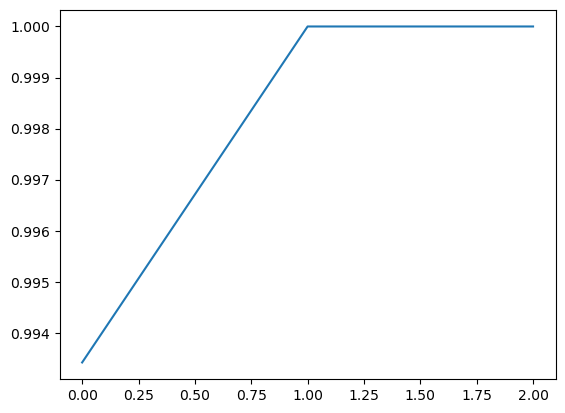

In [23]:
output = model(**tokenizer(str(sequence.seq) , return_tensors = "pt"))[0]
pca_sample = PCA()
sample = pca_sample.fit_transform(output.detach().numpy().squeeze())
print(pca_sample.explained_variance_ratio_)
plt.plot(np.cumsum(pca_sample.explained_variance_ratio_))

This graph shows the number of Columns and how much Variacne the capture

We can see that at $1$ Variance we have acheived the Maximum Varaince 

In [24]:
pca = PCA(n_components = 1)

pca.fit_transform(output.detach().numpy().squeeze().T).squeeze()

array([-0.05582691, -0.04506472, -0.2390365 , ...,  0.14752059,
        0.1953771 ,  0.01960441], dtype=float32)

Now we just need to do this for all the values in the `Fasta-Seq`. This can take a lot of time to process and thus I have limited this to $10,000$ values. 

In [25]:
class SLP_Data(Dataset):

    def __init__(self):
        super(SLP_Data).__init__()

        tokenizer = BertTokenizer.from_pretrained('Rostlab/prot_bert_bfd', do_lower_case=False )
        model = BertModel.from_pretrained("Rostlab/prot_bert_bfd").to("cuda")

        fasta_seq = SeqIO.parse(open("/content/Data/Train/train_sequences.fasta") ,'fasta')

        self.data = []
        counter = 0
        pca = PCA(n_components = 1)
        
        for sequ in tqdm.tqdm(fasta_seq , total = 142246):
    
            counter += 1

            if counter == 10000:break
            
            value = str(sequ.seq)
            value = value.replace("," , "")
            token = tokenizer(value , return_tensors = "pt")
            token = token.to("cuda")
            output = model(**token)
            output = output[0].cpu()
            token = pca.fit_transform(output.detach().numpy().squeeze().T).squeeze()
            
            self.data.append(token)

Now we will import the `Target Values`

In [26]:
class SLP_Data(Dataset):

    def __init__(self):
        super(SLP_Data).__init__()

        tokenizer = BertTokenizer.from_pretrained('Rostlab/prot_bert_bfd', do_lower_case=False )
        model = BertModel.from_pretrained("Rostlab/prot_bert_bfd").to("cuda")

        fasta_seq = SeqIO.parse(open("/content/Data/Train/train_sequences.fasta") ,'fasta')

        self.data = []
        counter = 0
        pca = PCA(n_components = 1)
        
        for sequ in tqdm.tqdm(fasta_seq , total = 142246):
    
            counter += 1

            if counter == 10000:break
            
            value = str(sequ.seq)
            value = value.replace("," , "")
            token = tokenizer(value , return_tensors = "pt")
            token = token.to("cuda")
            output = model(**token)
            output = output[0].cpu()
            token = pca.fit_transform(output.detach().numpy().squeeze().T).squeeze()
            
            self.data.append(token)

        self.targets = np.load("/content/sData/train_targets_top500.npy")[:10000]

Now we will set some `Getters` for the class

In [27]:
class SLP_Data(Dataset):

    def __init__(self):
        super(SLP_Data).__init__()

        tokenizer = BertTokenizer.from_pretrained('Rostlab/prot_bert_bfd', do_lower_case=False )
        model = BertModel.from_pretrained("Rostlab/prot_bert_bfd").to("cuda")

        fasta_seq = SeqIO.parse(open("/content/Data/Train/train_sequences.fasta") ,'fasta')

        self.data = []
        counter = 0
        pca = PCA(n_components = 1)
        
        for sequ in tqdm.tqdm(fasta_seq , total = 142246):
    
            counter += 1

            if counter == 10000:break
            
            value = str(sequ.seq)
            value = value.replace("," , "")
            token = tokenizer(value , return_tensors = "pt")
            token = token.to("cuda")
            output = model(**token)
            output = output[0].cpu()
            token = pca.fit_transform(output.detach().numpy().squeeze().T).squeeze()
            
            self.data.append(token)

        self.targets = np.load("/content/sData/train_targets_top500.npy")[:10000]

    def __len__(self):return self.targets.shape[0]

    def __getitem__(self , index):

        r_embed = torch.tensor(np.array(self.data[index]) , dtype = torch.float32)

        r_targets = torch.tensor(self.targets[index], dtype = torch.float32)

        return r_embed, r_targets


I am not getting the Embeddings in Kaggle. Every-time I try to access GPU, CUDA goes out of memory. Thats why I did this in Colab and extracted the embeddings in a `NPY File `

In [28]:
# SLP_train_data = SLP_Data()

# SLP_train_dataloader = torch.utils.data.DataLoader(SLP_train_data , batch_size = 128 , shuffle = True)

# 4 | Model Setup 🤖️ 

Now we will train Simple models, and see the results

# 4.1 | MultiLayerPerceptron 🧠

A `MultiLayerPerceptron` is a simple model, which consists of just few perceptrons/nodes/neurons connected with each other. 

As we have choosen for the `top-500` targets, our last layer of the network will contain 500 perceptrons, 

In [29]:
class MultiLayerPerceptron(torch.nn.Module):

    def __init__(self):
      
        super(MultiLayerPerceptron, self).__init__()

        # l_1 = Linear Layer 1 
        # a_1 = Activation Layer 1

        self.l_1 = torch.nn.Linear(1024 , 1000)
        self.a_1 = torch.nn.ReLU()

        self.l_2 = torch.nn.Linear(1000 , 900)
        self.a_2 = torch.nn.ReLU()
        
        self.l_3 = torch.nn.Linear(900 , 800)
        self.a_3 = torch.nn.ReLU()
        
        self.l_4 = torch.nn.Linear(800 , 700)
        self.a_4 = torch.nn.ReLU()
        
        self.l_5 = torch.nn.Linear(700 , 600)
        self.a_5 = torch.nn.ReLU()
        
        self.l_6 = torch.nn.Linear(600 , 500)
    
    def forward(self, x):
        
        x = self.l_1(x)
        x = self.a_1(x)

        x = self.l_2(x)
        x = self.a_2(x)
        
        x = self.l_3(x)
        x = self.a_3(x)
        
        x = self.l_4(x)
        x = self.a_4(x)
        
        x = self.l_5(x)
        x = self.a_5(x)
        
        x = self.l_6(x)
        
        return x

I cannot use `Kaggle GPUs` for some reason (I dont know why), so I will be commenting the `cuda` parts 

In [30]:
MLP = MultiLayerPerceptron()

# MLP = MultiLayerPerceptron().to("cuda")

# 4.2 | SLP Training 

A $Single$ $Layer$ $Perceptron$ is a `Neural Network Architechture` that consists of $1$ `Hidden Layer`. According to the `Paper`, we should  be having $1$ `Hidden Layer` with $1,000$ `Perceptrons` in it. 

In [31]:
class SingleLayerPerceptron(torch.nn.Module):

    def __init__(self):
        
        super(SingleLayerPerceptron, self).__init__()

        self.linear1 = torch.nn.Linear(1024, 1012)
        self.activation1 = torch.nn.ReLU()
        
        self.linear2 = torch.nn.Linear(1012, 500)

    def forward(self, x):
        
        x = self.linear1(x)
        x = self.activation1(x)
        
        x = self.linear2(x)
        
        return x

In [32]:
SLP = SingleLayerPerceptron()

# SLP = SingleLayerPerceptron().to("cuda")

# 5 | Loss Function 📉

$Loss$ is a `measure` of `how well a model is performing` on a given task. It is `calculated` by `comparing` the `model's predictions` to the `ground truth labels`. The `lower the loss`, the `better the model` is performing.

Here we will be using `Cross Entropy Loss` , a loss function that `measures` the `difference` between the `model's predicted probability distribution` and the `ground truth distribution`.

In [33]:
CrossEntropy = torch.nn.CrossEntropyLoss()

# 6 | Optimizer 💡

An $Optimizer$ is an `algorithm` or function that `updates the weights and biases` of a neural network in order to `minimize a loss function`. 

Here we will be using the `Adam Optimizer`

$Adam$ is an $Adaptive$ $Learning$ $Rate$ method, which works by `maintaining two moving averages of the gradients`
* $Mean$ - Calculate the `momentum term`, which helps to `prevent` the `optimizer` from `getting stuck in local minima`
* $Variance$ - Calculate the `learning rate`, which is `adjusted based on the magnitude of the gradients`.

$$m_t = \beta_1 * m_{t - 1} + (1 - \beta_1) * w_t$$

$$v_t = \beta_2 * m_{t - 1} + (1 - \beta_2) * w_t$$

$$m_t = \frac{m_t}{1 - \beta_1^t}$$

$$v_t = \frac{v_t}{1 - \beta_2^t}$$

$$w_{t+1} = w_t - \frac{n}{\sqrt{v_t + e}} * m_t$$

In [34]:
optimizer = torch.optim.Adam(MLP.parameters(), lr = 0.0005)

# 7 | Training Loop 🔁 

In [35]:
from IPython.display import IFrame

Now we will start the training loop 

I dont the exact reason, but everytime I try to access `GPU` for some training in `Kaggle`. `CUDA goes out of memory`. Thus I have trained the model on `Colab` and will imported the results to `Wandb`.

```
los = []

for epochs in (range(5)):

    losses = []

    for x , y in tqdm.tqdm(train_dataloader):
        
        x = torch.tensor(x , dtype = torch.float32)
        y = torch.tensor(x , dtype = troch.float32)
        
        
#         x = torch.tensor(x , dtype = torch.float32).to("cuda")
#         y = torch.tensor(y , dtype = torch.float32).to("cuda")

        optimizer.zero_grad()
        preds = model(x)

        loss = CrossEntropy(preds, y)
        losses.append(loss)

    los.append(losses)
```

```
---------------------------------------------------------------------------
OutOfMemoryError                          Traceback (most recent call last)
Cell In[31], line 15
     12 img = img.to("cuda")
     13 mask = mask.to("cuda")
---> 15 outputs = model(img)  
     17 loss =  loss_func(outputs , mask)
     19 loss.backward()

File /opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1501, in Module._call_impl(self, *args, **kwargs)
   1496 # If we don't have any hooks, we want to skip the rest of the logic in
   1497 # this function, and just call forward.
   1498 if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks or self._forward_pre_hooks
   1499         or _global_backward_pre_hooks or _global_backward_hooks
   1500         or _global_forward_hooks or _global_forward_pre_hooks):
-> 1501     return forward_call(*args, **kwargs)
   1502 # Do not call functions when jit is used
   1503 full_backward_hooks, non_full_backward_hooks = [], []

File /opt/conda/lib/python3.10/site-packages/segmentation_models_pytorch/base/model.py:29, in SegmentationModel.forward(self, x)
     25 """Sequentially pass `x` trough model`s encoder, decoder and heads"""
     27 self.check_input_shape(x)
---> 29 features = self.encoder(x)
     30 decoder_output = self.decoder(*features)
     32 masks = self.segmentation_head(decoder_output)

File /opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1501, in Module._call_impl(self, *args, **kwargs)
   1496 # If we don't have any hooks, we want to skip the rest of the logic in
   1497 # this function, and just call forward.
   1498 if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks or self._forward_pre_hooks
   1499         or _global_backward_pre_hooks or _global_backward_hooks
   1500         or _global_forward_hooks or _global_forward_pre_hooks):
-> 1501     return forward_call(*args, **kwargs)
   1502 # Do not call functions when jit is used
   1503 full_backward_hooks, non_full_backward_hooks = [], []

File /opt/conda/lib/python3.10/site-packages/segmentation_models_pytorch/encoders/efficientnet.py:73, in EfficientNetEncoder.forward(self, x)
     71             drop_connect = drop_connect_rate * block_number / len(self._blocks)
     72             block_number += 1.0
---> 73             x = module(x, drop_connect)
     75     features.append(x)
     77 return features

File /opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1501, in Module._call_impl(self, *args, **kwargs)
   1496 # If we don't have any hooks, we want to skip the rest of the logic in
   1497 # this function, and just call forward.
   1498 if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks or self._forward_pre_hooks
   1499         or _global_backward_pre_hooks or _global_backward_hooks
   1500         or _global_forward_hooks or _global_forward_pre_hooks):
-> 1501     return forward_call(*args, **kwargs)
   1502 # Do not call functions when jit is used
   1503 full_backward_hooks, non_full_backward_hooks = [], []

File /opt/conda/lib/python3.10/site-packages/efficientnet_pytorch/model.py:111, in MBConvBlock.forward(self, inputs, drop_connect_rate)
    109 x = self._depthwise_conv(x)
    110 x = self._bn1(x)
--> 111 x = self._swish(x)
    113 # Squeeze and Excitation
    114 if self.has_se:

File /opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1501, in Module._call_impl(self, *args, **kwargs)
   1496 # If we don't have any hooks, we want to skip the rest of the logic in
   1497 # this function, and just call forward.
   1498 if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks or self._forward_pre_hooks
   1499         or _global_backward_pre_hooks or _global_backward_hooks
   1500         or _global_forward_hooks or _global_forward_pre_hooks):
-> 1501     return forward_call(*args, **kwargs)
   1502 # Do not call functions when jit is used
   1503 full_backward_hooks, non_full_backward_hooks = [], []

File /opt/conda/lib/python3.10/site-packages/efficientnet_pytorch/utils.py:80, in MemoryEfficientSwish.forward(self, x)
     79 def forward(self, x):
---> 80     return SwishImplementation.apply(x)

File /opt/conda/lib/python3.10/site-packages/torch/autograd/function.py:506, in Function.apply(cls, *args, **kwargs)
    503 if not torch._C._are_functorch_transforms_active():
    504     # See NOTE: [functorch vjp and autograd interaction]
    505     args = _functorch.utils.unwrap_dead_wrappers(args)
--> 506     return super().apply(*args, **kwargs)  # type: ignore[misc]
    508 if cls.setup_context == _SingleLevelFunction.setup_context:
    509     raise RuntimeError(
    510         'In order to use an autograd.Function with functorch transforms '
    511         '(vmap, grad, jvp, jacrev, ...), it must override the setup_context '
    512         'staticmethod. For more details, please see '
    513         'https://pytorch.org/docs/master/notes/extending.func.html style="color:rgb(175,0,0)">')

File /opt/conda/lib/python3.10/site-packages/efficientnet_pytorch/utils.py:67, in SwishImplementation.forward(ctx, i)
     65 @staticmethod
     66 def forward(ctx, i):
---> 67     result = i * torch.sigmoid(i)
     68     ctx.save_for_backward(i)
     69     return result

OutOfMemoryError: CUDA out of memory. Tried to allocate 40.00 MiB (GPU 0; 15.90 GiB total capacity; 319.37 MiB already allocated; 7.75 MiB free; 326.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
```

In [36]:
IFrame("https://wandb.ai//ayushsinghal659/CAFA%7CMLP/reports/CAFA-MLP--Vmlldzo0Nzk1NjQx" , 1300 , 400)

As we can see we did not get good results, but we will try to omprove our results, by improving the model and by adding new one 

# 8 | TO DO LIST 📄

```
TO DO 1 : VISUALIZE THE DATA

TO DO 2 : TRAIN A MODEL

TO DO 3 : TRY DIFFERENT MODELS

TO DO 4 : ADD WANDB SUPPORT

TO DO 5 : ADD TENSORFLOW DATA LOADER

TO DO 6 : TRAIN A TF MODEL

TO DO 7 : IMPROVE RESULTS

TO DO 8 : DECREASE TRAINING TIME

TO DO 9 : DANCE 
```

# 9 | Ending 🏁

**THAT'S IT FOR TODAY GUYS**

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK $:)$**

<img src = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT $:)$**